# Keras Tutorial: The Ultimate Beginner’s Guide to Deep Learning in Python

In [21]:
import numpy as np
np.random.seed(123)  # for reproducibility

## Theano oder Tensorflow als Backend

```
$ pip install Theano
```

oder

```
$ sudo apt install libatlas-base-dev
$ source /home/bk/jupyter-env/bin/activate
$ pip install tensorflow
```


This is the *keras.json* file for theano backend:

```
{
    "floatx": "float32",
    "epsilon": 1e-07,
    "backend": "theano",
    "image_data_format": "channels_first"
}
```

This is the *keras.json* file for tensorflow backend:

```
{
    "floatx": "float32",
    "epsilon": 1e-07,
    "backend": "tensorflow",
    "image_data_format": "channels_last"
}
```

Default wird "tensorflow" als Backend genommen.



The problem has to do with the expected dimension ordering.  
- Tensorflow ordering (tf): Shapes are expected to be (size_lines,size_columns,**channel**)
- Theano ordering (th): Shapes are expected to be (**channel**,size_lines,size_columns)

If you change the ordering line in the keras.json file to "image_dim_ordering": "th" it should work. (i'd bet that's what's in your Elementary OS keras.json).

In [58]:
# import the Sequential model type from Keras
from keras.models import Sequential

In [23]:
# import the "core" layers from Keras. These are the layers that are used in almost any neural network
from keras.layers import Dense, Dropout, Activation, Flatten

In [24]:
# import the CNN layers from Keras. These are the convolutional layers that will help us efficiently train on image data
from keras.layers import Conv2D, MaxPooling2D

In [25]:
# import some utilities. This will help us transform our data later
from keras.utils import np_utils

## Load image data from MNIST

In [32]:
# Keras library conveniently includes it already. We can load it like so
from keras.datasets import mnist
 
# Load pre-shuffled MNIST data into train and test sets
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [33]:
# look at the shape of the dataset

print(X_train.shape)
# we have 60,000 samples in our training set, and the images are 28 pixels x 28 pixels each

(60000, 28, 28)


In [34]:
# confirm this by plotting the first sample in matplotlib
from matplotlib import pyplot as plt
import matplotlib.cm as cm

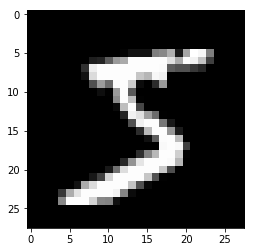

In [35]:
plt.imshow(X_train[0], cmap=cm.gray)
plt.show()

In [125]:
#X_train[0]

## Preprocess input data for Keras

In [44]:
# Our MNIST images only have a depth of 1, but we must explicitly declare that
# have to transform our dataset from having shape (n, width, height) to (n, depth, width, height)

# attention to the tensorflow ordering (tf): Shapes are expected to be (size_lines,size_columns,channel)
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)

In [45]:
# To confirm, we can print X_train's dimensions again
print(X_train.shape)

(60000, 28, 28, 1)


In [46]:
# convert our data type to float32 and normalize our data values to the range [0, 1]
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

## Preprocess class labels for Keras

In [47]:
# shape of our class label data
print(y_train.shape)

(60000,)


In [48]:
# take a look at the labels for the first 10 training samples
print(y_train[:10])

[5 0 4 1 9 2 1 3 1 4]


In [49]:
# Convert 1-dimensional class arrays to 10-dimensional class matrices
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)

In [50]:
# eine 1 auf der x-Achse steht für die jeweilige Ziffer (10 Kategorien: 0 .. 9)
print(Y_train[:10])

[[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]]


## Define model architecture

In [51]:
# start by declaring a sequential model format
model = Sequential()

In [52]:
# declare the input layer
#model.add(Convolution2D(32, 3, 3, activation='relu', input_shape=(1,28,28)))

# attention to the tensorflow ordering (tf): Shapes are expected to be (size_lines,size_columns,channel)
model.add(Conv2D(32, (3, 3), input_shape=(28,28,1), activation='relu'))

In [53]:
#model.add(Convolution2D(32, 3, 3, activation='relu'))
model.add(Conv2D(32, (3, 3), activation='relu'))
# MaxPooling2D is a way to reduce the number of parameters in our model by sliding a 2x2 pooling filter
# across the previous layer and taking the max of the 4 values in the 2x2 filter
model.add(MaxPooling2D(pool_size=(2,2)))
# Dropout(): method for regularizing our model in order to prevent overfitting
model.add(Dropout(0.25))

In [54]:
# add a fully connected layer and then the output layer

# weights from the Convolution layers must be flattened (made 1-dimensional)
# before passing them to the fully connected Dense layer
model.add(Flatten())
# Dense(): first parameter is the output size of the layer
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
# final layer has an output size of 10, corresponding to the 10 classes of digits
model.add(Dense(10, activation='softmax'))

## Compile model

In [55]:
# When we compile the model, we declare the loss function and the optimizer (SGD, Adam, etc.)
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

## Fit model on training data

In [56]:
# declare the batch size and number of epochs to train for, then pass in our training data
model.fit(X_train, Y_train,
          batch_size=32, epochs=10, verbose=1)

Epoch 1/10
60000/60000 [==============================] - 56s 940us/step - loss: 2.3016 - acc: 0.1114
Epoch 2/10
60000/60000 [==============================] - 56s 938us/step - loss: 2.3014 - acc: 0.1124
Epoch 3/10
60000/60000 [==============================] - 55s 915us/step - loss: 2.3013 - acc: 0.1124
Epoch 4/10
60000/60000 [==============================] - 55s 923us/step - loss: 2.3014 - acc: 0.1124
Epoch 5/10
60000/60000 [==============================] - 56s 931us/step - loss: 2.3013 - acc: 0.1124
Epoch 6/10
60000/60000 [==============================] - 56s 940us/step - loss: 2.3014 - acc: 0.1124
Epoch 7/10
60000/60000 [==============================] - 56s 936us/step - loss: 2.3013 - acc: 0.1124
Epoch 8/10
60000/60000 [==============================] - 56s 925us/step - loss: 2.3013 - acc: 0.1124
Epoch 9/10
60000/60000 [==============================] - 56s 941us/step - loss: 2.3014 - acc: 0.1124
Epoch 10/10
60000/60000 [==============================] - 56s 941us/step - loss: 

## Evaluate model on test data

In [108]:
# evaluate our model on the test data
# returns the loss value & metrics values for the model in test mode
score = model.evaluate(X_test, Y_test, verbose=1)

10000/10000 [==============================] - 2s 236us/step


In [109]:
score

[2.301018048095703, 0.1135]

In [124]:
print(X_test.shape)
#X_test[0]

(10000, 28, 28)


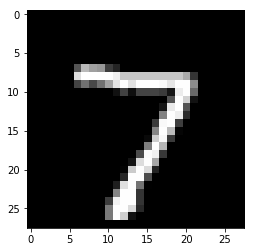

In [123]:
#image_array = np.asfarray(X_test[0].reshape((28,28)))
image_array = X_test[0].reshape((28,28))
plt.imshow(image_array, cmap=cm.gray, interpolation='None')
plt.show()

In [120]:
#X_test[0]
#image_array

In [115]:
y_dim = model.predict(X_test[0].reshape((1, 28,28, 1)))
y_dim.reshape((10))
y = y_dim[0, :] # access first row of y_dim for plotting

In [119]:
# choose the digit with greatest possibility as predicted dight
y_dim_digit = y_dim[0].tolist().index(max(y_dim[0].tolist()))
print("The predicted digit is:", y_dim_digit)

The predicted digit is: 7


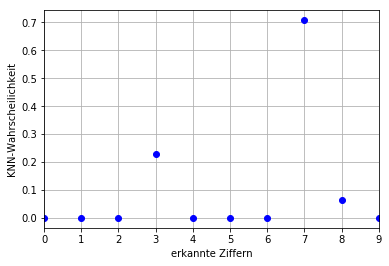

In [117]:
x_dim = np.arange(10)
plt.plot(x_dim, y_dim[0, :], 'bo')
plt.xlim(0, 9)
plt.xlabel("erkannte Ziffern")
plt.ylabel("KNN-Wahrscheilichkeit")
plt.grid(True)

## Export the model

In [91]:
# to save a trained model, use the model.save() function in keras
from keras.models import load_model

model.save('mnist_trained_model.h5')  # creates a HDF5 file

# Raspberry Pi digit recognizer

In [95]:
from picamera import PiCamera
from time import sleep

camera = PiCamera(resolution=(1792,1792))
camera.rotation = 180
camera.start_preview()
sleep(5)
camera.capture('digit_image.jpg')
camera.stop_preview()
camera.close()

In [5]:
# install 'scikit-image' first (pip install scikit-image)
import skimage.io as skio
import numpy as np
import matplotlib.pyplot as plt

#im = imread("digit_image.jpg")
im = skio.imread("digit_image_crop.jpg")

In [54]:
import skimage.transform as skt

# resize to 28 x 28
im_resize = skt.resize(im,(28,28), mode='constant')

import skimage.color as skc
import skimage.util as sku

# turn the image from color to gray
im_gray = skc.rgb2gray(im_resize)

# the color of the original set are inverted, so we invert it here
im_gray_invert = 255 - im_gray*255
#im_gray_invert = im_gray*255
#im_gray_invert = sku.invert(im_gray*255)

#treat color under threshold as black (0) and over threshold as white (255)
im_gray_invert[im_gray_invert<=150] = 0
#im_gray_invert[im_gray_invert>=230] = 255
im_gray_invert

array([[  0.        ,   0.        ,   0.        ,   0.        ,
          0.        ,   0.        ,   0.        ,   0.        ,
          0.        ,   0.        ,   0.        ,   0.        ,
          0.        ,   0.        ,   0.        ,   0.        ,
          0.        ,   0.        ,   0.        ,   0.        ,
          0.        ,   0.        ,   0.        ,   0.        ,
          0.        ,   0.        ,   0.        ,   0.        ],
       [  0.        ,   0.        ,   0.        ,   0.        ,
          0.        ,   0.        ,   0.        ,   0.        ,
          0.        ,   0.        ,   0.        ,   0.        ,
          0.        ,   0.        ,   0.        ,   0.        ,
          0.        ,   0.        ,   0.        ,   0.        ,
          0.        ,   0.        ,   0.        ,   0.        ,
          0.        ,   0.        ,   0.        ,   0.        ],
       [  0.        ,   0.        ,   0.        ,   0.        ,
          0.        ,   0.        ,   

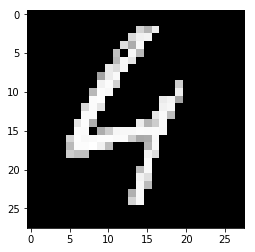

In [55]:
import matplotlib.cm as cm
plt.imshow(im_gray_invert, cmap=cm.gray, interpolation='None')

In [56]:
from keras.models import load_model
model=load_model('mnist_trained_model.h5')

im_final = im_gray_invert.reshape(1,28,28,1)

In [57]:
# the below output is a array of possibility of respective digit
ans = model.predict(im_final)
print(ans)

[[1.3555777e-29 6.3973330e-24 2.1617232e-30 9.9988675e-01 0.0000000e+00
  5.4816907e-22 7.1179590e-11 3.3099706e-14 1.1318169e-04 0.0000000e+00]]


In [58]:
# choose the digit with greatest possibility as predicted digit
ans = ans[0].tolist().index(max(ans[0].tolist()))
print("the predicted digit is",ans)

the predicted digit is 3
